In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Question 3: One dimensional interpolation and application
#### a) Linear interpolation

In [91]:
x = np.linspace(1,20,7)
x_true = np.linspace(1,30,1000)

In [92]:
def fx(x):
    return 2*x*np.sin(0.8*x)

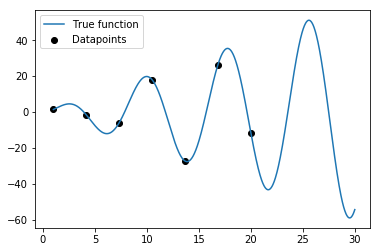

In [93]:
plt.title('')
plt.plot(x_true, fx(x_true),label='True function')
plt.scatter(x,fx(x),c='k',label='Datapoints')
plt.legend()

In [87]:
def linear_interpolation(x, f, num_values, begin, end):
    """
    Interpolate given 'x' values and function 'f' at 'num_values' linearly separated between 'begin' and 'end'
    """
    # y values
    y = f(x)
    # interpolated y values
    y_values = []
    # interpolated x values
    x_values = np.linspace(begin,end,num_values)

    
    # Interpolation
    for i in range(len(x)-1):
        # calculate slope between two points
        a = ( y[i+1] - y[i] ) / (x[i+1] - x[i])
        # take only x values between two points
        x_values_now = x_values[(x_values >= x[i]) & (x_values < x[i+1])]
        # calculate y values as linear interpolation
        y_values += list(y[i] + (x_values_now - x[i])*a)
        
    # Extrapolation, is simply extrapolating final bin
    x_values_now = x_values[(x_values >= x[i+1])]
    y_values += list(y[i] + (x_values_now - x[i])*a)
    
    return x_values, np.asarray(y_values)



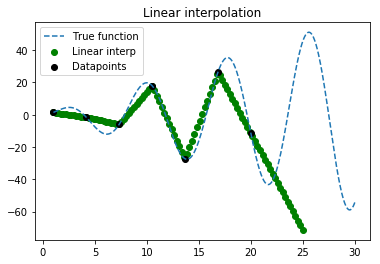

In [149]:
x_values, y_values = linear_interpolation(x,fx, 100, 1, 25)
plt.scatter(x_values,y_values,label='Linear interp',c='g')
plt.plot(x_true, fx(x_true),label='True function', ls='dashed')
plt.scatter(x,fx(x),c='k',label='Datapoints')
plt.legend()
plt.title('Linear interpolation')
plt.show()

#### a) Polynomial interpolation (Neville's algorithm)

In [124]:
def recurrence_relation(i, j, x, all_x, f):
    """
    Neville's algorithm recurrence relation
    i,j -- int   -- index of the datapoints 
    x   -- float -- x value to evaluate
    all_x -- array -- data points x
    f   -- function -- function that calculates y(x)
    """
    if i == j:
        # return y_i
        return f(all_x[i])
    else:
        # return the recursive relation
        return ( ((x - all_x[j])*recurrence_relation(i, j-1, x, all_x, f) 
         - (x-all_x[i])*recurrence_relation(i+1, j, x, all_x, f)) /
        (all_x[i] - all_x[j]) ) 

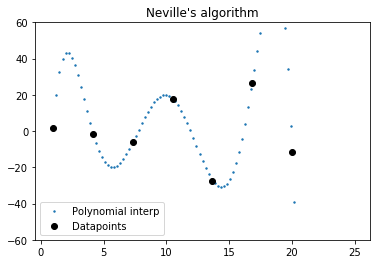

In [152]:
x_values = np.linspace(1, 25, 100)
# Calculate the y values accompanying the x values with Neville algorithm
y_values = [recurrence_relation(0,len(x)-1, x_values[i], x, fx) for i in range(len(x_values)) ]

plt.scatter(x_values, y_values, label='Polynomial interp', s=2)
#plt.plot(x_true, fx(x_true),label='True function', ls='dashed')
plt.scatter(x,fx(x),c='k',label='Datapoints')
plt.legend()
plt.ylim(-60,60)
plt.title("Neville's algorithm")
plt.show()

#### a) Cubic spline

In [153]:
def cubic_spline_ABCD(j, x, all_x):
    """
    Return the coefficients ABCD for cubic spline interpolation
    j     -- int   -- index of datapoint
    x     -- float -- point to interpolate
    all_x -- array -- all sampled datapoints
    """
    
    A = (all_x[j+1] - x)/(all_x[j+1] - all_x[j])
    B = 1 - A
    C = 1./6 * (A**3 - A)*(all_x[j+1]-all_x[j])**2
    D = 1./6 * (B**3 - B)*(all_x[j+1]-all_x[j])**2
    
    return A, B, C, D

In [154]:
A, B, C, D = cubic_spline_ABCD(0, 3, x)

In [155]:
def find_second_derivative(j, all_x, condition='natural'):
    """
    Find the second derivative by imposing that the first derivative 
    is equal evaluated at xj in the interval [x_j-1, x_j] to the first
    derivative evaluated at xj in the interval [x_j, x_j+1]
    
    This results in N-2 equations with N unkowns
    
    if condition = 'natural', we set the first and last second
    derivative to zero as boundary conditions
    """
    
    # left hand side
    lhs =  1/6.* (all_x[j] - all_x[j-1]) * 
    
    
    
    

0.3684210526315788 0.6315789473684212 -0.5321637426900581 -0.6345029239766078
